<a href="https://colab.research.google.com/github/mmarossi/Hiper/blob/main/Hiper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Base_Hiper.xlsx to Base_Hiper.xlsx


In [ ]:
nome_do_arquivo="Base_Hiper.xlsx"
df=pd.read_excel(nome_do_arquivo)
df.head(3)


,SIGLA,Unidade,Regional,Mes,VendaBruta(Mil),Eficiencia,Perdas,Ativos,Desligados,Turnover,BancoHoras,HorasAusencia,HoraTrabalhada,ABS
0,BAN,Brasília Asa Norte,SP LESTE - CT OESTE,1.0,11594.28714,0.173764,-0.875068,253.0,3.0,0.011858,290.220000,1074.29,40239.0,0.026698
1,BCV,Casa Verde,SP SUL - MINAS,1.0,8449.99743,0.228539,-2.418104,219.0,7.0,0.031963,711.420001,2015.53,33237.0,0.060641
2,BGU,Guarulhos Dutra,SP LESTE - CT OESTE,1.0,5506.70833,0.220652,-0.582947,153.0,5.0,0.032680,312.360000,1456.21,24750.0,0.058837


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   SIGLA            700 non-null      object 
 1   Unidade          700 non-null      object 
 2   Regional         700 non-null      object 
 3   Mes              700 non-null      float64
 4   VendaBruta(Mil)  1048575 non-null  float64
 5   Eficiencia       700 non-null      float64
 6   Perdas           700 non-null      float64
 7   Ativos           700 non-null      float64
 8   Desligados       700 non-null      float64
 9   Turnover         700 non-null      float64
 10  BancoHoras       700 non-null      float64
 11  HorasAusencia    700 non-null      float64
 12  HoraTrabalhada   700 non-null      float64
 13  ABS              700 non-null      float64
dtypes: float64(11), object(3)
memory usage: 112.0+ MB


In [ ]:
df.describe()

,Mes,VendaBruta(Mil),Eficiencia,Perdas,Ativos,Desligados,Turnover,BancoHoras,HorasAusencia,HoraTrabalhada,ABS
count,700.00000,1.048575e+06,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,4.00000,8.387051e+00,0.183442,-1.576443,260.904286,7.132857,0.028219,386.307643,2325.663756,41296.295714,0.056889
std,2.00143,3.459610e+02,0.036829,0.766884,58.488234,4.474797,0.018234,366.536958,858.851211,9196.319165,0.019061
min,1.00000,0.000000e+00,-0.104862,-5.884470,136.000000,0.000000,0.000000,0.000000,710.120000,22665.000000,0.016317
25%,2.00000,0.000000e+00,0.159022,-1.908468,218.000000,4.000000,0.015073,118.505000,1707.312492,34630.750000,0.044093
50%,4.00000,0.000000e+00,0.176636,-1.562693,253.000000,6.000000,0.025302,296.630000,2202.395002,40120.500000,0.054017
75%,6.00000,0.000000e+00,0.200490,-1.169097,287.000000,10.000000,0.037837,563.932501,2754.222508,45689.500000,0.067714
max,7.00000,3.229305e+04,0.348535,1.799648,464.000000,26.000000,0.099174,2656.510008,7198.820016,73884.000000,0.175645


In [51]:
#10 unidades com maior média de banco de horas?
df.groupby('Unidade')['BancoHoras'].mean().sort_values(ascending=False).head(10)                      

Unidade
Santos Praiamar            2039.037144
Recife                     1157.927143
Norte Shopping             1155.709998
Limão                      1137.567144
São Vicente                 946.769998
JP Cidade dos Bancários     918.664287
João Pessoa                 880.684287
Domingos Ferreira           845.105713
Ponta Negra                 834.095715
Manilha                     824.555715
Name: BancoHoras, dtype: float64

In [52]:
#10 unidades com maior média de Turnover?
df.groupby('Unidade')['Turnover'].mean().sort_values(ascending=False).head(10)                        

Unidade
Campo Grande            0.075365
Champagnat              0.064005
Parolin                 0.055185
Caxias                  0.054216
Pinhais                 0.051427
Passos D'Areia          0.048886
Goiânia Anápolis        0.046258
Cambuci Lion            0.045586
Londrina                0.045340
Ribeirão Preto Norte    0.043557
Name: Turnover, dtype: float64

In [53]:
#10 unidades com maior média de absenteísmo?
df.groupby('Unidade')['ABS'].mean().sort_values(ascending=True).head(10)                    

Unidade
Fortaleza Barão         0.036157
Campo Grande 54         0.036970
Tamboré                 0.036998
Alcântara               0.039201
Duque de Caxias         0.039254
Pirituba                0.039516
Santo André             0.039630
São José Rio Preto      0.040572
Belford Roxo            0.041521
Tatuapé Celso Garcia    0.042029
Name: ABS, dtype: float64

Text(0.5, 1.0, 'Turnover por Regional')

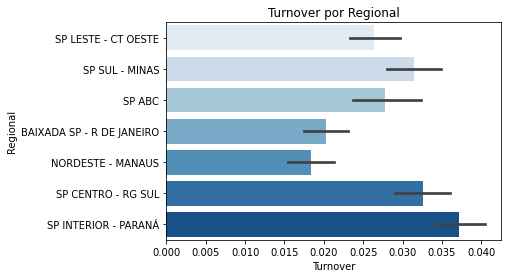

In [ ]:
#gráfico de turnover por Regional
g1= sns.barplot(y='Regional', x='Turnover', data=df, palette="Blues")
g1.set_title("Turnover por Regional")

Text(0.5, 1.0, 'Absenteísmo por Regional')

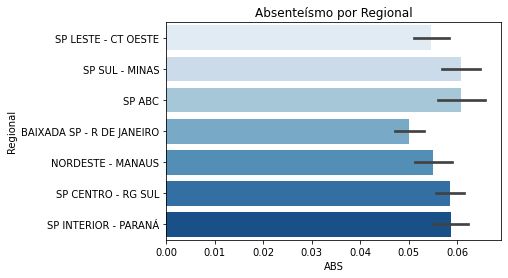

In [ ]:
#gráfico de ABS por Regional
g2=sns.barplot(y='Regional', x='ABS', data=df, palette="Blues")
g2.set_title("Absenteísmo por Regional")

Text(0.5, 1.0, 'Banco de Horas por Regional')

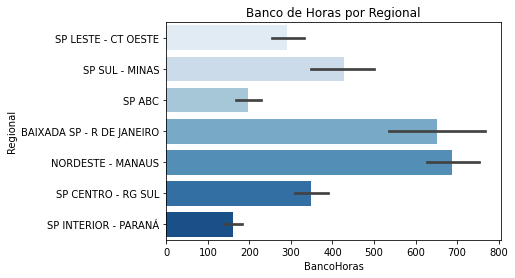

In [ ]:
#gráfico de banco de horas por Regional
g3=sns.barplot(y='Regional', x='BancoHoras', data=df, palette="Blues")
g3.set_title("Banco de Horas por Regional")

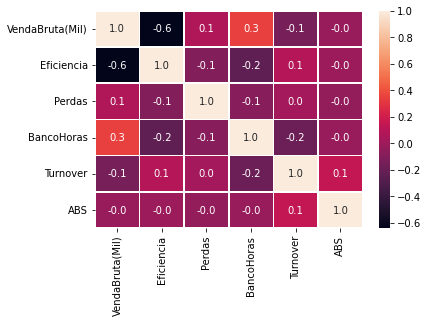

In [ ]:
df1 = df[['VendaBruta(Mil)','Eficiencia', 'Perdas', 'BancoHoras', 'Turnover', 'ABS']]
correlation = df1.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

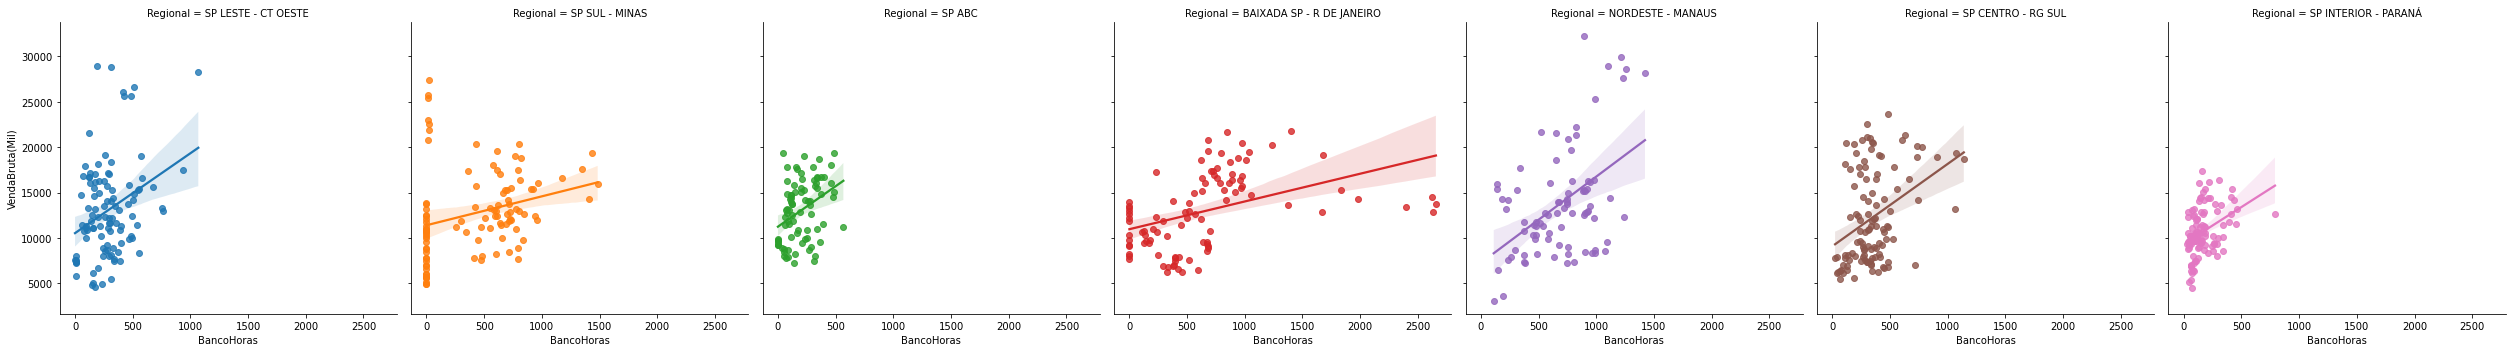

In [ ]:
sns.lmplot(x='BancoHoras', y='VendaBruta(Mil)', data=df, hue='Regional' , col='Regional')

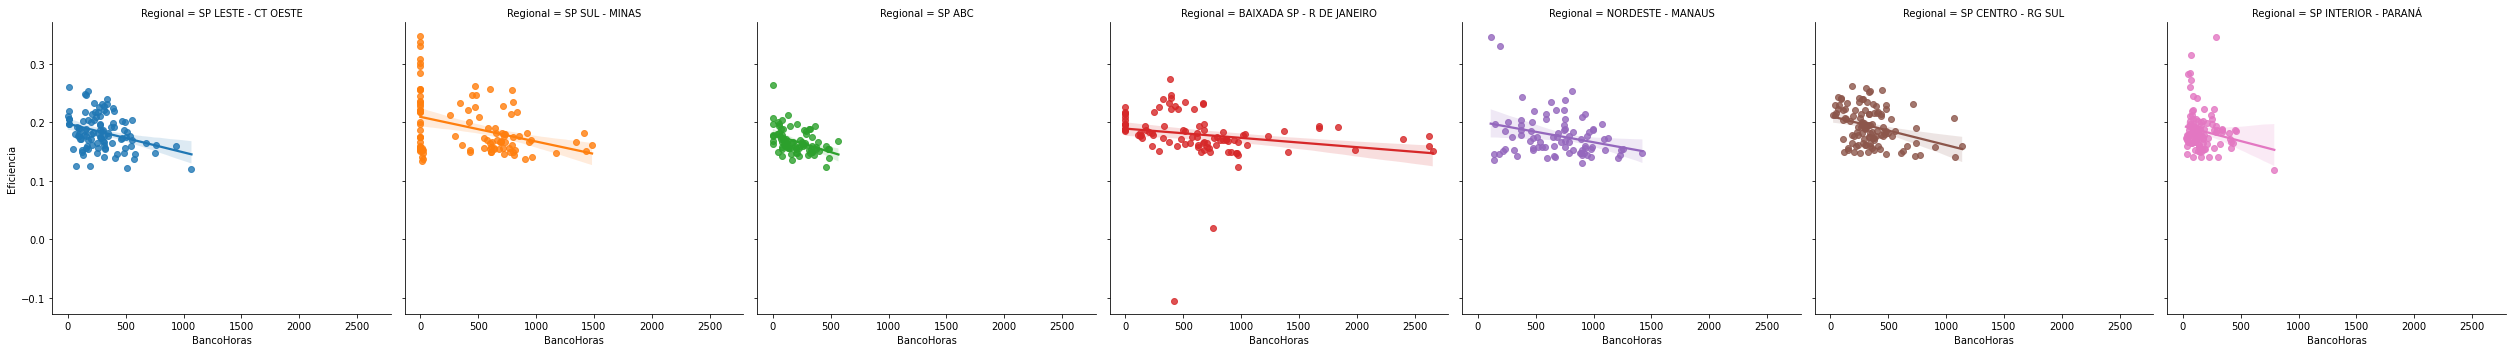

In [ ]:
sns.lmplot(x='BancoHoras', y='Eficiencia', data=df, hue='Regional' , col='Regional')

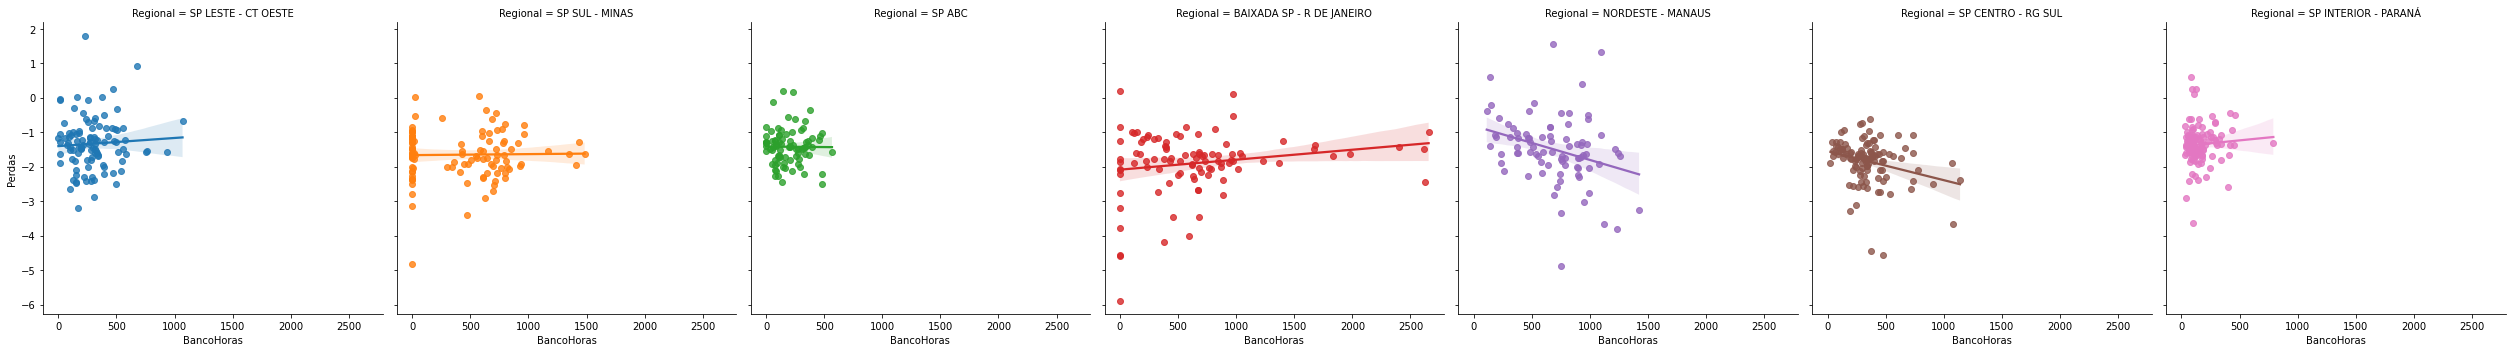

In [ ]:
sns.lmplot(x='BancoHoras', y='Perdas', data=df, hue='Regional' , col='Regional')

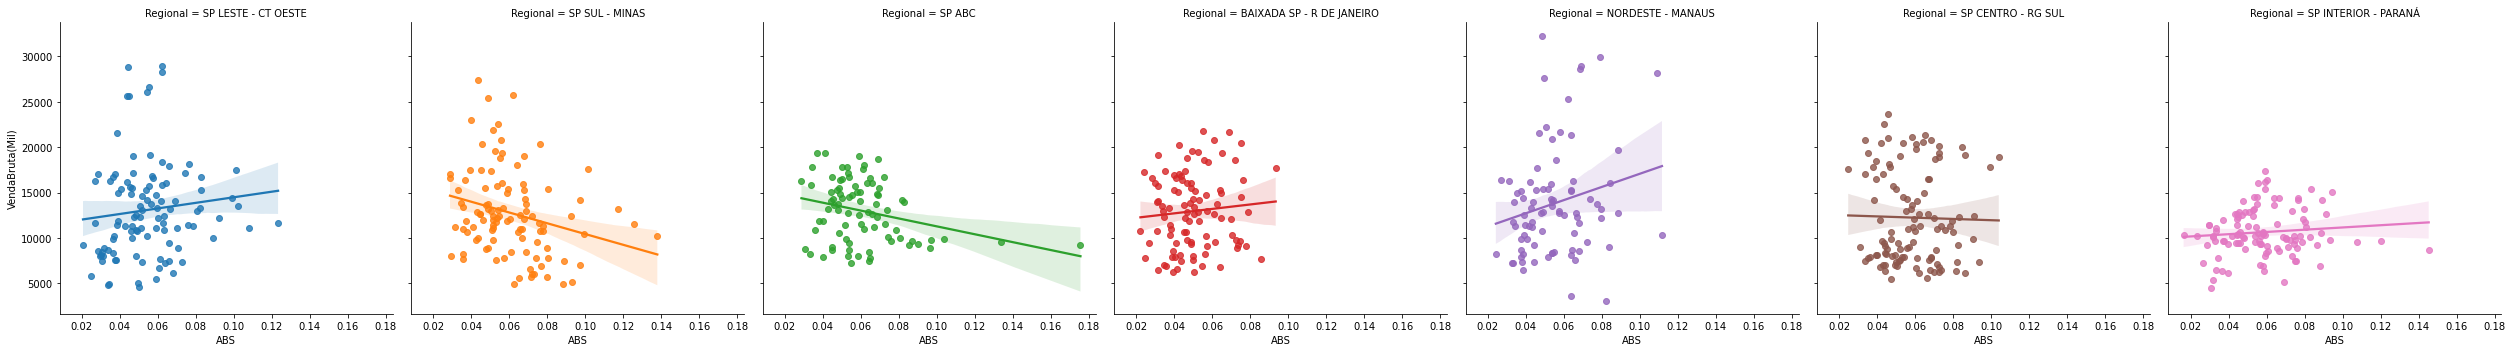

In [ ]:
sns.lmplot(x='ABS', y='VendaBruta(Mil)', data=df, hue='Regional' , col='Regional')

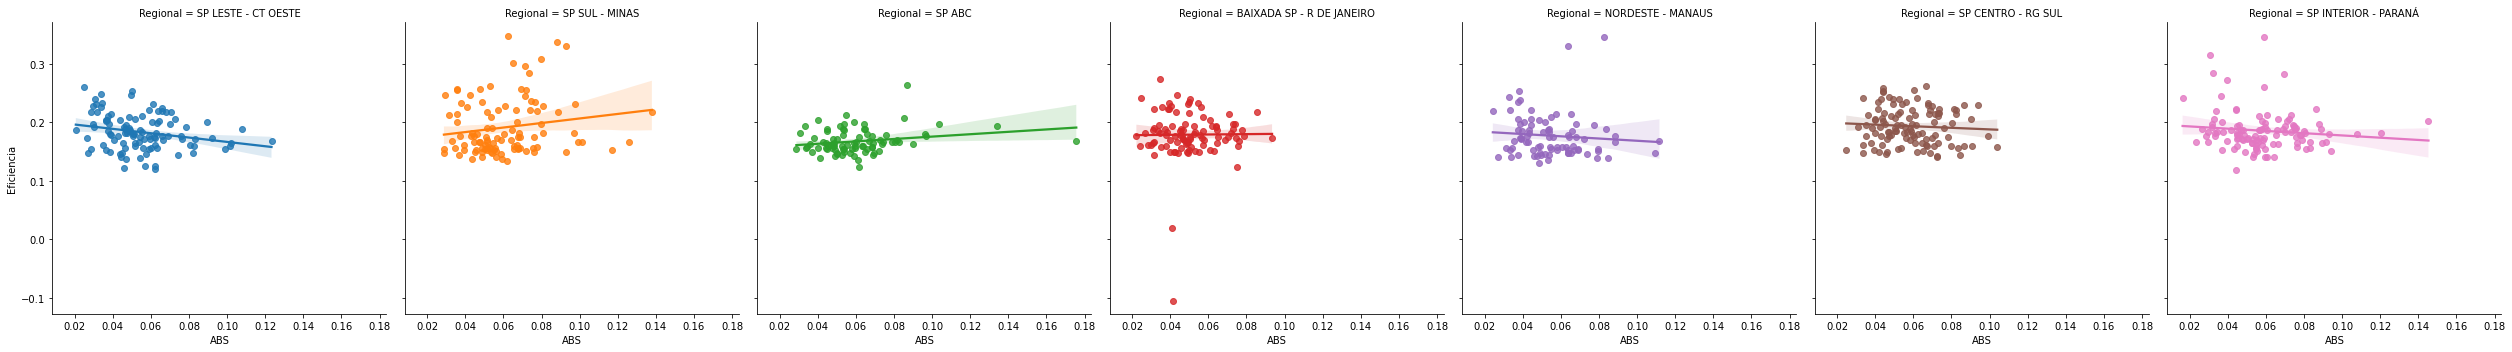

In [ ]:
sns.lmplot(x='ABS', y='Eficiencia', data=df, hue='Regional' , col='Regional')

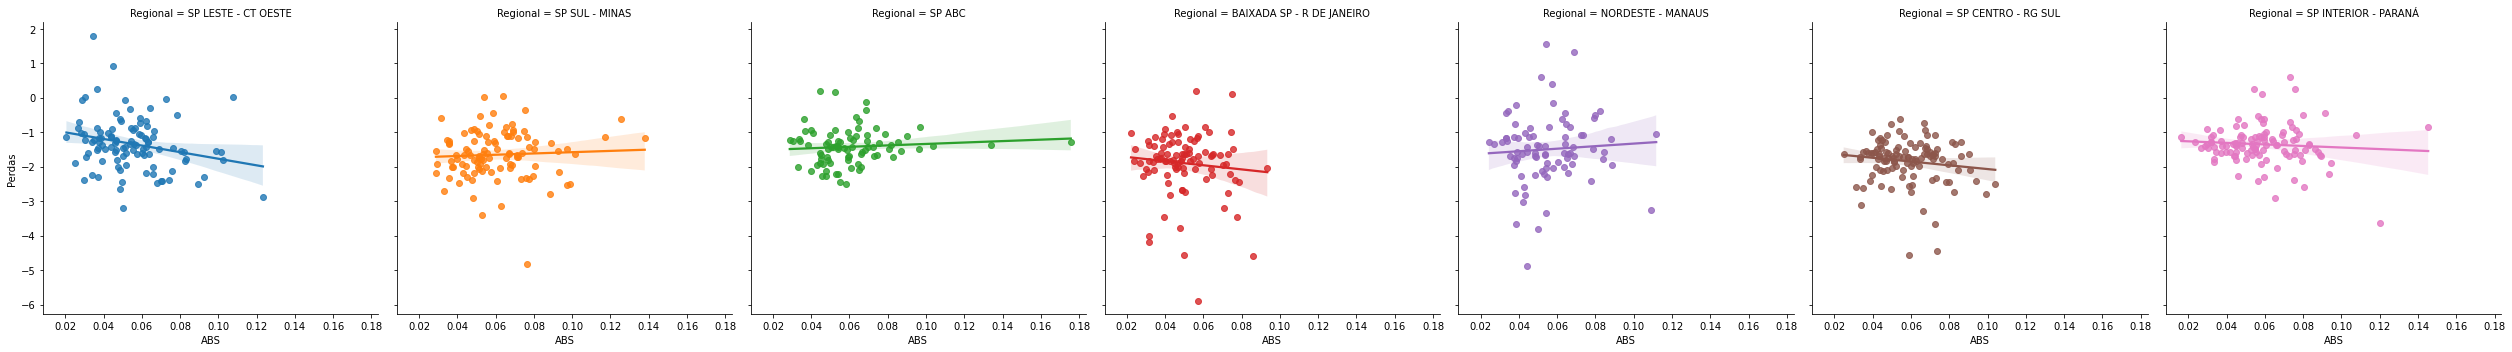

In [ ]:
sns.lmplot(x='ABS', y='Perdas', data=df, hue='Regional' , col='Regional')

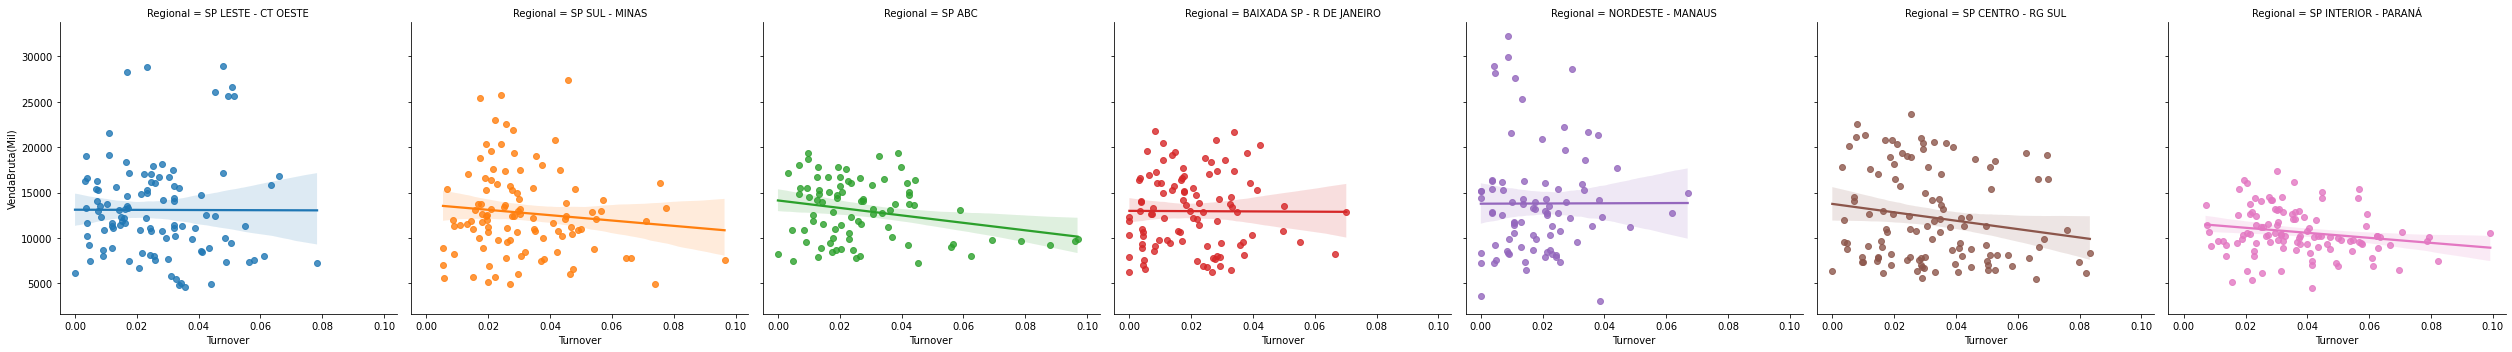

In [ ]:
sns.lmplot(x='Turnover', y='VendaBruta(Mil)', data=df, hue='Regional' , col='Regional')

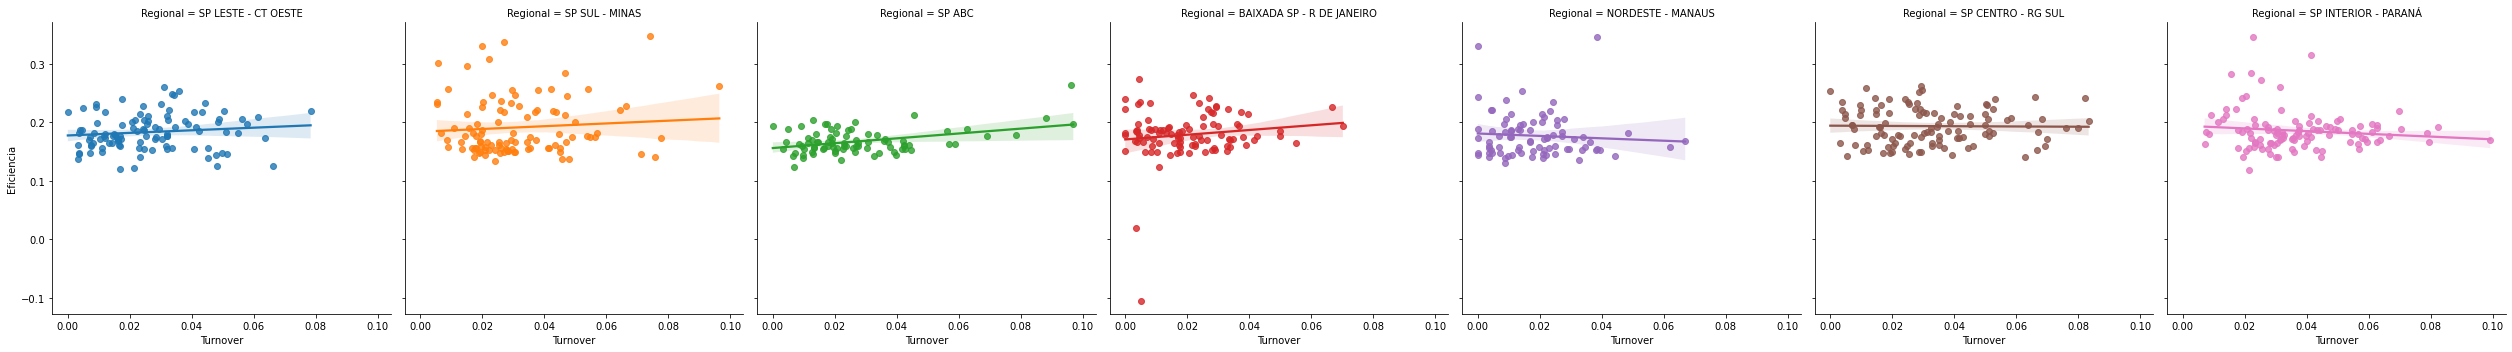

In [ ]:
sns.lmplot(x='Turnover', y='Eficiencia', data=df, hue='Regional' , col='Regional')

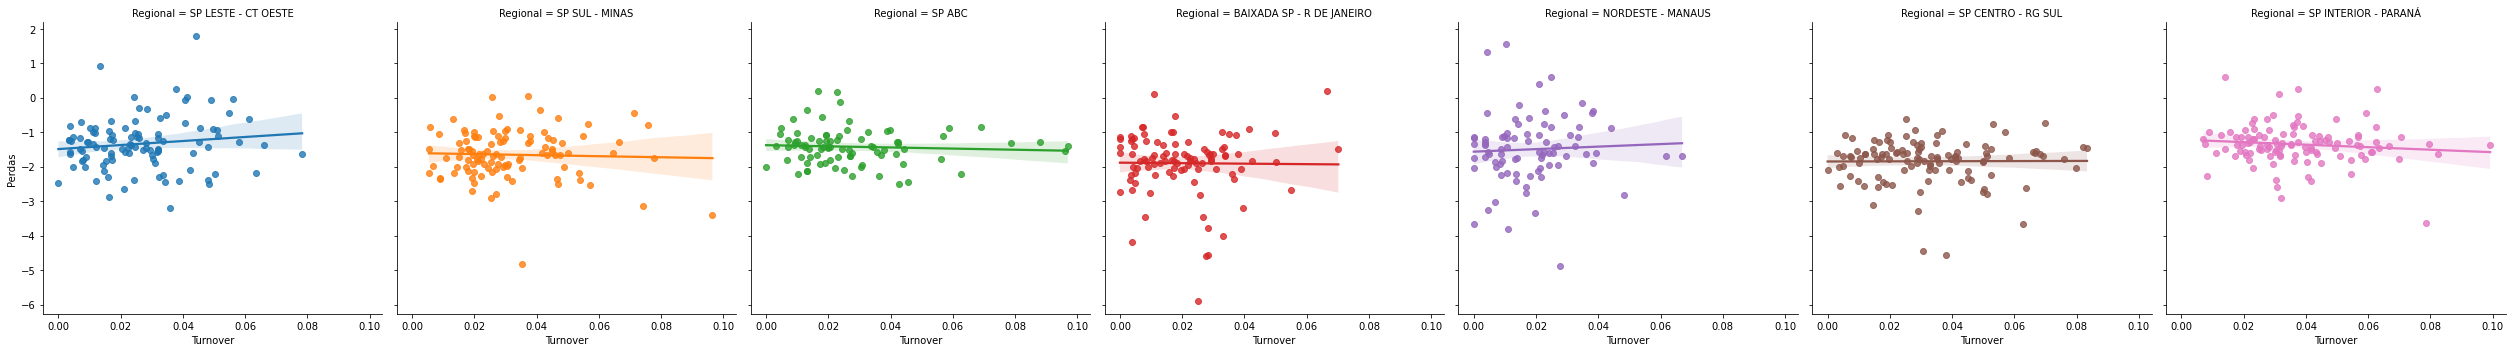

In [ ]:
sns.lmplot(x='Turnover', y='Perdas', data=df, hue='Regional' , col='Regional')